<a href="https://colab.research.google.com/github/mspruc/UTCW/blob/main/UTCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the Continuous World Hand-in


# Exercises


## Exercise 14.1.18

Evaluate the double integral by inspection.


$$
  \int\int_{x^2+y^2\leq a^2} \sqrt{a^2-x^2-y^2}dA
$$

Since the integral's region $x^2 + y^2 \leq a^2$ is a circle with radius $a$ and the integral is over a sphere by $\sqrt{a^2-x^2-y^2}$ and the circle "cuts" the sphere in half, it must calculate the volume of a hemisphere. A hemisphere volume is determined by $2/3 \pi * r^3$ we simply substitute the radius in the hemisphere volume equation with $a$ and we get: $2/3 \pi * a^3$.

In [ ]:
!pip install plotly 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.express as px
import plotly.figure_factory as ff 
import plotly.graph_objects as go



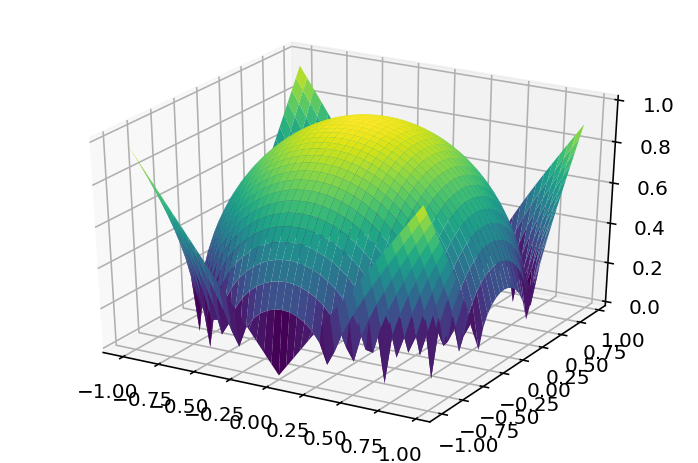

In [ ]:
x = y = np.arange(-1, 1, 0.05)
x,y = np.meshgrid(x,y)

ax = plt.axes(projection='3d')
ax.plot_surface(x, y, np.sqrt(abs(1-x**2-y**2)),cmap='viridis', edgecolor='none')


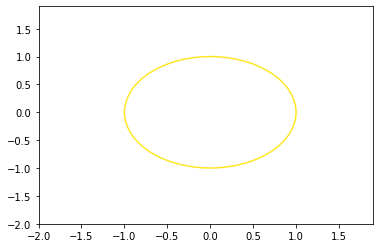

In [ ]:
#for whatever reason mat plot lib doesnt support equations like x**2+y**2=1 so we have to do this

# Create xy plane
xmax = 1.5                   #arbitrary
x = y = np.arange(-2,2,0.1)  #arbitrary
x, y = np.meshgrid(x,y)

# Define how the circle looks
C = x**2+y**2


levels  = np.arange(-2, 2,1) ##arbitrary

# Create the figure
fig, ax = plt.subplots()

# Plot streamlines: C assumes the values saved in the array levels
ax.contour(x, y, C, levels)

plt.show()

##Exercise 14.1.19
Evaluate the double integral by inspection
$$\int\int_{x^2+y^2 \leq a^2}(a-\sqrt{x^2+y^2})$$

Like 14.1.18 we are again dealing with a circular region for the integral with a radius $a$. With the integral over $a-\sqrt{x^2+y^2}$ representing a cone. A cone has the volume formula: $1/3\pi hr^2$ substitute a for radius  and height and we get:

$$1/3 \pi a^3$$

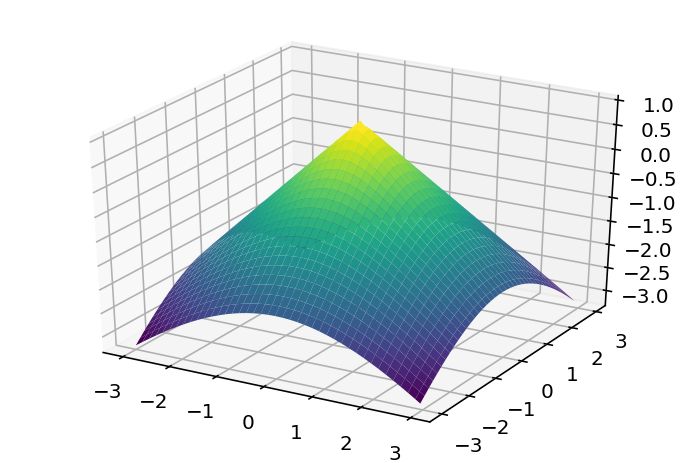

In [ ]:
x = y = np.arange(-3.0, 3.0, 0.05)
x,y = np.meshgrid(x,y)

ax = plt.axes(projection='3d')
ax.plot_surface(x, y, 1-np.sqrt(x**2+y**2),cmap='viridis', edgecolor='none')




##Exercise 14.2.11
Evaluate the integral by iteration.
$$\int\int_D ln(x) dA \text{ where $D$ is the finite region in the first quadrant bounded by the line $2x+2y=5$ and the hyperbola $xy=1$}$$

We start by plotting the domain:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

divide by zero encountered in true_divide



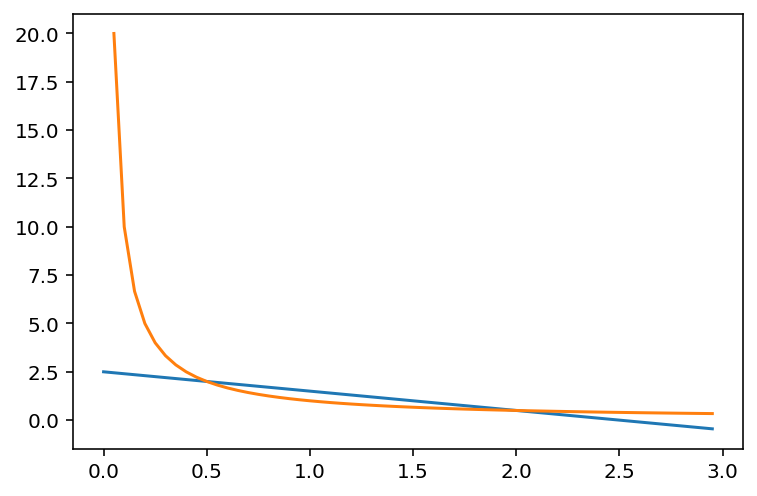

In [ ]:
x = np.arange(0,3,0.05)
plt.plot(x, 5/2-x)
plt.plot(x,1/x)

We can see that the domains intersect at 2 different points. To find the points we simply put them side by side:

$$2x+2y=5 \rightarrow y = 5/2 - x \\
xy = 1 \rightarrow y=1/x \\
5/2-x=1/x \rightarrow x=1/2, x = 2
$$

Evaluate it at y we get that for $x=0.5$ y is $2$ and $x=2$, $y=0.5$
How we can calulate the definite integral.

We start by integrating the expression with respect to y, from the lower function $1/x$ plotted in red, to the upper function $5/2-x$ plotted in blue, we use the fact that $ln(x)$ is a constant so we move it outside of the integral with respect to y:

$$
\int^2_{1/2}\int_{1/x}^{5/2-x} ln(x)dydx = \int^2_{1/2} ln(x) dx\int_{1/x}^{5/2-x}dy \rightarrow \int^2_{1/2}ln(x) y |_{1/x}^{5/2-x} dx = \int^2_{1/2} ln(x)(5/2-x-1/x) dx \\
$$

The expression is a bit ugly so we simplify:

$$
\int^2_{1/2} ln(x)(5/2-x-1/x) dx = \int^2_{1/2} ln(x)5/2-ln(x)x-ln(x)/x dx 
$$

Using the integral sum rule we split the integral into 3 parts


$$
\int^2_{1/2} ln(x)5/2-ln(x)x-ln(x)/x dx \rightarrow\\
\int^2_{1/2} ln(x)5/2dx, \int^2_{1/2}ln(x)xdx, \int^2_{1/2} ln(x)/x
$$

In order:
$$
\int^2_{1/2} ln(x)5/2dx = 5/2(xln(x)-x)|^2_{1/2}\\
=5/2(2ln(2)-2)-5/2(1/2ln(1/2)-1/2) = 5ln(2)-5-5/4ln(1/2)+5/4 = -15/4+25/4ln(2)\\
\int^2_{1/2}ln(x)xdx =1/2x^2ln(x)-x^2/4 |^2_{1/2} = (1/2*2^2ln(2)-2^2/4)-(1/2*1/2^2ln(1/2)-1/2^2/4)\\
=2ln(2)-1-ln(1/2)/8+1/16=-15/16+17/8ln(2)\\
\int^2_{1/2} ln(x)/x = ln^2(x)/2 |^2_{1/2}=ln^2(2)/2-ln^2(1/2)/1/2 = 0
$$

gather the components we get:

$$
(-15/4+25/4ln(2)) - (-15/16+17/8ln(2)) - 0 = -45/16+33/8ln(2)
$$

##Exercise 14.2.17

Sketch the domain of integration and evaluate the given iterated integrals. For integral: 

$$\int_0^1dx\int^1_x \frac{y^\lambda}{x^2+y^2} dy,(\lambda > 0 )$$

We start by sketching the domain:
I'll do it manually in python with matplotlib.

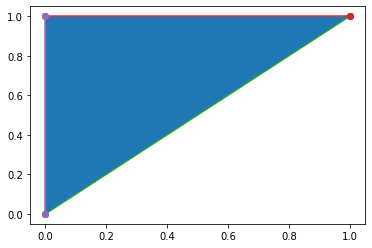

In [ ]:
fig, ax = plt.subplots()

#first we will look at the upper bound of the domain which is (1,1)
x1 = y1 = 1
ax.plot(x1,y1,marker = 'o')
#next we will look at the lower bound, 0 and x
x2 = y2 = 0 #self explanatory
ax.plot(x2,y2,marker = 'o')

#and x gives x = y and defined by already defined upper bound we get
line1 = ax.plot([x1,x2],[y1,y2],marker = 'o')

#now since we have a lower bound at y=x we know that our domain of the triangular shaped being formed is the upper left.
line2 = ax.plot([0,1],[1,1],marker = 'o')

#finishing our domain
line3 = ax.plot([0,0],[0,1],marker = 'o')

ax.fill_between([x2,x1,x2],[y2,y1,y1]) #coloring in our domain


Now we can evaluate the integral:

$$\int_0^1dx\int^1_x \frac{y^\lambda}{x^2+y^2} dy,(\lambda > 0 )$$

We will start by bringing out the $y^\lambda$ as it makes it a lot harder to integrate, by extension we will also integrate with respect to x instead otherwise $y^\lambda$ will end up hanging.
$$\int_0^1 y^\lambda dy\int^1_x \frac{1}{x^2+y^2} dx \rightarrow \int^y_0 \frac{1}{x^2+y^2}dx = \tan^{-1}(x/y)\frac{1}{y}|^y_0  $$

evaluating:
$$
(tan^{-1}(y/y)1/y) - (tan^{-1}(0/y)1/y) = (\frac{\pi/4}{y})-(0) = \frac{\pi}{4y}
$$

Now that we have evaluated it we need to integrate with respect to y and remember the $y^\lambda$:

$$\int^1_0y^\lambda * \frac{\pi}{4y}dy = \int^1_0 \frac{y^\lambda\pi}{4y}dy = \frac{\pi}{4}\int^1_0 y^{\lambda-1} = \frac{y^{\lambda}\pi}{4\lambda}|^1_0 = (\frac{\pi}{4\lambda}) - (0) = \frac{\pi}{4\lambda}, (\lambda > 0)
$$ 
since $\lambda$ is in the denominator we still have to be careful about the constraints posed in the exercise that $\lambda > 0$

##Exercise 15.1.13
Describe the streamlines of the given velocity fields for $v(x,y,z)=xzi+yzj+xk$

The components of a vector field **F** is given by:
$$
F(x,y,z)=F_1(x,y,z)i+F_2(x,y,z)j+F_3(x,y,z)k
$$

The streamlines of a field F is given by 

$$
\frac{dx}{F_1(x,y,z)}=\frac{dy}{F_2(x,y,z)}=\frac{dz}{F_3(x,y,z)}
$$

And thus $F_1$ etc. are defined by:

$$
F_1=zxi,F_2=yzj,F_3=xk
$$

And so the streamlines of the field are found by finding the antiderivatives of the F components so:

$$
  \frac{dx}{zx}=\frac{dy}{yz}=\frac{dz}{x}
$$

We can multiply by z in this equation to simplify

$$
  \frac{dx}{zx}=\frac{dy}{yz}=\frac{dz}{x}\rightarrow (\frac{dx}{zx}=\frac{dy}{yz}=\frac{dz}{x})*z = dx/x=dy/y = z*dz/x \\
  dx/x=dy/y = z*dz/x = ln(x) + C = ln(y) + C = 1/x*z^2/2 + C
$$

We can simplify $F_1$ and $F_2$ by putting them to the power of $e$ and remember logarithm rules with ln + C.

$$
  F_1=F_2 \rightarrow e^{ln(xC)} = e^{ln(y)}\rightarrow xC=y
$$


We still need to simplify $F_3$, so we multiply both sides with x:
$$
  F_1=F_3=dx/x=z*dz/x \rightarrow dx = zdz \rightarrow x = z^2/2 +C
$$

Thus we have both of our field line equations:

$$C=y/x \text{ and } x-z^2/2= C$$

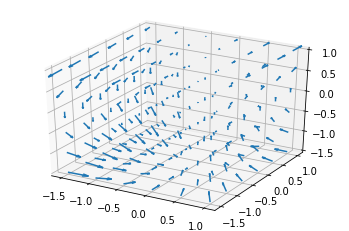

In [ ]:
# Create xy plane
x = y = z = np.arange(-1.5, 1.5, 0.5)

x, y, z = np.meshgrid(x, y, z)

i = x*z; j=y*z; k=x

fig.show()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, i, j, k, length=0.1)
plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in true_divide



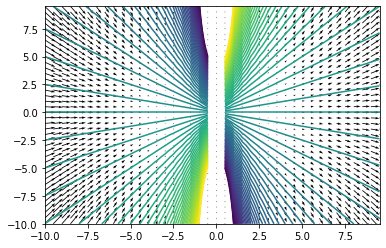

In [ ]:
x = y = z = np.arange (-10, 10, 0.5)

x, y = np.meshgrid(x, y)

i = x*z; j=y*z; k=x

C=y/x
levels = np.arange(-10,10,0.25)


# Create the figure
fig, ax = plt.subplots()
ax.quiver(x,y,i,j)

# Plot streamlines: C assumes the values saved in the array levels
ax.contour(x, y, C, levels)

plt.show()

##Exercise 15.1.14
Describe the streamlines of the given velocity fields. For the field:
$$
v(x,y,z)=e^{xyz}(xi+y^2j+zk)
$$

The components of a vector field **F** is given by:
$$
F(x,y,z)=F_1(x,y,z)i+F_2(x,y,z)j+F_3(x,y,z)k
$$

The streamlines of a field F is given by 

$$
\frac{dx}{F_1(x,y,z)}=\frac{dy}{F_2(x,y,z)}=\frac{dz}{F_3(x,y,z)}
$$

And thus $F_1$ etc. are defined by:

$$
F_1=xi,F_2=y^2j,F_3=zk
$$

And so the streamlines of the field are found by finding the antiderivatives of the F components so:

$$
  \frac{dx}{x}=\frac{dy}{y^2}=\frac{dz}{z}
$$
Calculating the antiderivatives gives us:

$$
ln(|x|) + C = -1/y + C = ln(|z|)+C
$$

We can simplify $F_1$ and $F_3$, we use that C is an arbitrary constant and change it to $ln(C)$:
$$
ln(|x|)+ln(|C|)=ln(|z|) \rightarrow xc=z \rightarrow c=z/x
$$

For $F_2$ we have that:

$$
ln(|x|) = -1/y + ln(|C|)
$$


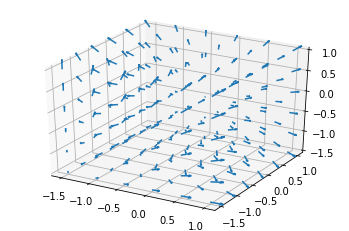

In [ ]:
# Create xy plane
x = y = z = np.arange(-1.5, 1.5, 0.5)

x, y, z = np.meshgrid(x, y, z)

i = x; j=y**2; k=z

fig.show()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, i, j, k, length=0.1)
plt.show()


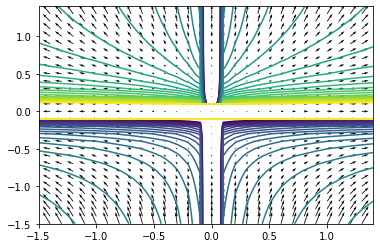

In [ ]:
# Create xy plane
xmax = 1.5
x = y = np.arange(-xmax,xmax,0.1)
x, y = np.meshgrid(x,y)

# Define vector field
I = x; J = y**2;
#U = np.cos(Y); V = np.sin(-X)

# Define streamlines
C = np.log(abs(x))+1/y
#C = -np.cos(X) - np.sin(Y)


levels  = np.arange(-10, 10,0.5)

# Create the figure
fig, ax = plt.subplots()
ax.quiver(X,Y,I,J)

# Plot streamlines: C assumes the values saved in the array levels
ax.contour(x, y, C, levels)

plt.show()

##Exercise 15.2.9
Show that the vector field;
$$
F(x,y,z) = \frac{2x}{z}i+\frac{2y}{z}j-\frac{x^2+y^2}{z^2}k
$$
is conservative, and find its potential. Describe the equipotential surfaces. Find the field lines of F.

To show that a vector field is conservative we start by analysing the neccesary condition which in 3D is given by:

$$
\frac{\partial F_1}{\partial y}=\frac{\partial F_2}{\partial x}, \frac{\partial F_1}{\partial z}=\frac{\partial F_3}{\partial x},\frac{\partial F_2}{\partial z}=\frac{\partial F_3}{\partial y}
$$

So we know that the components of a vector field **F** is given by:
$$
F(x,y,z)=F_1(x,y,z)i+F_2(x,y,z)j+F_3(x,y,z)k
$$

And thus $F_1$ etc. are defined by:

$$
F_1=\frac{2x}{z},F_2=\frac{2y}{z},F_3=-\frac{x^2+y^2}{z^2}
$$


While the field is undefined at $z=0$ **F** might still be conservative outside $z=0$

So we can finally take the partial derivatives to try and satisfy the neccesary condition:

$$
\frac{\partial F_1}{\partial y}=0=\frac{\partial F_2}{\partial x}=0, \frac{\partial F_1}{\partial z}=\frac{-x}{z^2}=\frac{\partial F_3}{\partial x} = \frac{-x}{z^2},\frac{\partial F_2}{\partial z}=\frac{-2y}{z^2}=\frac{\partial F_3}{\partial y} = \frac{-2y}{z^2}
$$

So the field does indeed satisfy the neccesary condition. And **F** might be conservative outside $z=0$. To test this, the potential $\phi$ should satisfy

$$
\frac{\partial\phi}{\partial x}=F_1,\frac{\partial\phi}{\partial y}=F_2,\frac{\partial\phi}{\partial z}=F_3
$$

$$
  d\phi = F_1(x,y,z)dx+F_2(x,y,z)dy+F_3(x,y,z)dz
$$


Integrating the components gets:

$$
F_1dx=\frac{x^2}{z},F_2dy=\frac{y^2}{z},F_3dz=-\frac{x^2+y^2}{z}
$$

So we know that our potential function satisfies:
$$
\phi = \frac{x^2}{z} + c(y,z) 
$$
Similarly:
$$
\frac{\partial \phi}{\partial y} = c_y(y,z) = 2y/z
$$

Integrating with respect to y. So now we know that 
$$
c(y,z) = \frac{y^2}{z} + c(z)
$$

We can insert it with our initial equation so:

$$
\phi=\frac{x^2}{z}+\frac{y^2}{z}+c(z)
$$

Now we have to find $c(z)$ so, as before, we find the partial derivative of the function with respect to $z$:

$$
\frac{\partial \phi}{\partial z} = -\frac{x^2+y^2}{z^2}+c'(z)
$$

Equating it with the original equation:
$$
-\frac{x^2+y^2}{z^2}+c'(z) = -\frac{x^2+y^2}{z^2} \\ 
$$

So this means that $c(z)$ must equal $0$. $c(z) = 0$ and futhermore
$\frac{x^2+y^2}{z}$ is a potential function for $F$. And by the definition of equipotential surface. $\phi(x,y,z)=C$ the equipotential function is simply:
$$
\phi(x,y,z)= \frac{x^2+y^2}{z} = C
$$

and the equipotential surfaces are circular.

Finding the field lines, we know that field lines are given by the equation:

$$
\frac{dx}{F_1(x,y,z)}=\frac{dy}{F_2(x,y,z)}=\frac{dz}{F_3(x,y,z)} \\
= \frac{dx}{2x/z}=\frac{dy}{2y/z}=\frac{dz}{-\frac{x^2+y^2}{z^2}} \\
= \frac{dx}{2x}=\frac{dy}{2y}
$$

For the first field line we have that $dx/x = dy/y \rightarrow ln(|x|) = ln(|y|) + C = y/x=C$ and for $F_1$ and $F_3$:
$$
\frac{dx}{\frac{2x}{z}}=\frac{dz}{-\frac{x^2+y^2}{z^2}} \rightarrow z/2x dx = \frac{z^2}{x^2+y^2} dz\rightarrow \frac{1}{2x}dx=\frac{-z}{x^2+y^2}dz\\
=\frac{x^2+y^2}{2x}dx=-zdz
$$

Now we use the fact that $y = xC$ 

$$
\frac{x^2+C^2x^2}{2x} dx = \frac{1+C^2}{2}x dx =-zdz \rightarrow \frac{1+C^2}{2}x^2/2 = -z^2/2 + C_2\\
=(1+C^2)x^2=-z^2 +C_2 \rightarrow x^2+x^2C^2+z^2=C_2
$$

Now we use $y = xC$ again to get out that constant so:
$$
x^2+y^2+z^2=C_2
$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/axes3d.py:2523: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/axes3d.py:2524: RuntimeWarning:

invalid value encountered in double_scalars



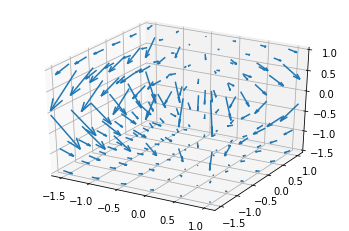

In [ ]:
# Create xy plane
x = y = z = np.arange(-1.5, 1.5, 0.5)

x, y, z = np.meshgrid(x, y, z)

i = (2*x)/z; j=(2*y)/z; k=-(x**2+y**2)/z**2

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, i, j, k,pivot = 'middle', length=0.05)
plt.show()


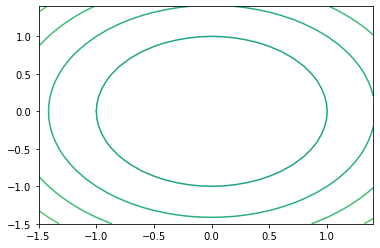

In [ ]:
# Create xy plane
xmax = 1.5
x = y = np.arange(-xmax,xmax,0.1)
x, y = np.meshgrid(x,y)

# Define vector field
I = 2*x/1; J = 2*y/1

# Define how the equipotential surface could look like, missing z components.
C = x**2+y**2


levels  = np.arange(-10, 10,1)

# Create the figure
fig, ax = plt.subplots()

# Plot streamlines: C assumes the values saved in the array levels
ax.contour(x, y, C, levels)

plt.show()

##Exercise 15.3.5
Find the mass of a wire along the curve:
$$
  r=3ti+3t^2j+2t^3k, (0\leq t\leq 1)
$$
if the density at $r(t)$ is $1+t$ g/unit length.

We know the mass for a parameterization is given by:
$$
  m=\int_\mathcal{C}\rho(x)ds
$$

$$
  m=\int_\mathcal{C}f(x,y,z)ds=\int^b_af(r(t))|\frac{dr}{dt}|dt=\int^b_af(x(t),y(t),z(t))\sqrt{\frac{dx}{dt}^2+\frac{dy}{dt}^2+\frac{dz}{dt}^2}
$$
So now we just have to evaluate the integrals:
$$
\frac{dx}{dt} = 3,\frac{dy}{dt} =  6t,\frac{dz}{dt} = 6t^2
$$

so we get that:
$$
ds= \sqrt{3^2+(6t)^2+(6t^2)^2} = \sqrt{9+36t^2+36t^4} = \sqrt{9(1+4t^2+4t^4)} \\
=3\sqrt{1+4t^2+4t^4} = 3\sqrt{(2t^2+1)^2}=3(2t^2+1) = 6t^2+3
$$

we can evaluate the integral:
$$
\int_0^1 (1+t) * (6t^2+3)dt = \int_0^1 6t^2+3+6t^3+3tdt =2t^3+3t+6/4t^4 +3/2t^2|^1_0 \\
= (2*1^3+3*1+6/4*1^4+3/2*1^2) - (2*0^3+3*0+6/4*0^4 +3/2*0^2) = (2+3+6/4+3/2)-(0) = 8 g
$$


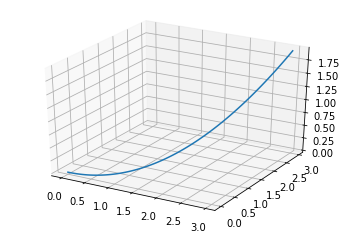

In [ ]:
# Create xy plane
t = np.arange(0,1,0.01)

i = 3*t; j=3*t**2; k=2*t**3

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(i,j,k)
plt.show()


## Exercise 15.4.1
Evaluate the line integral of the tangential component of the given vector field along the given curve

$$
F(x,y)=xyi-x^2j \text{ along } y=x^2 \text{ from } (0,0) \text{ to } (1,1)
$$

We know the line integral is given by:

$$
\int_{\mathcal{C}}F \cdot dr
$$

We find $\mathcal C$ to be the parameterization of $y=x^2$ which is:
$$
  r(t)=ti+t^2j, (0\leq t \leq 1)
$$

and $dr$ is given by:
$$
  dr = dti+2tdtj
$$

On the right hand of the dot we insert our dr $dti+2tdtj$ and on the left hand side we insert $ti+t^2j$:

$$
F \cdot dr = (t*t^2i-t^2j) \cdot(i+2tj)dt = (t^3i-t^2j) \cdot(i+2tj)dt  \rightarrow (t^3-2t^3) = (-t^3)
$$

Now we can evaluate the integral from 0 to 1:

$$
\int_{\mathcal C} F \cdot dr = -\int_0^1t^3 = -\frac{t^4}{4} |^1_0 = -\frac{1}{4} - 0 = \frac{-1}{4}
$$

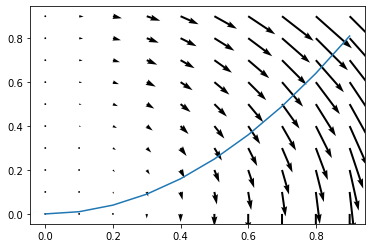

In [ ]:
# Create xy plane

x = y = np.arange(0,1,0.1)
x, y = np.meshgrid(x,y)

# Define vector field
I = x*y; J = -x**2;

# Create the figure
fig, ax = plt.subplots()
ax.quiver(x,y,I,J)

t = np.arange(0,1,0.1)
i = t; j = t**2
ax.plot(i,j)
plt.show()

##Exercise 15.4.7
Find the work done by the force field

$$
F=(x+y)i+(x-z)j+(z-y)k
$$

in moving an object from $(1,0,-1)$ to $(0,-2,3)$ along any smooth curve.

Since we have a smooth curve we know that work done is calculated by

$$
W = \int_{\mathcal C} F\cdot dr = \int_{\mathcal C}F_1dx+F_2dy+F_3dz.   
$$

$$
F_1dx = x^2/2+yx, F_2dy = yx-yz, F_3dz = z^2/2-yz
$$
Evaluating it:

$$
F_1 \rightarrow \frac{x^2}{2}+xy|^{(0,-2,3)}_{(1,0,-1)} = 0/2+0 - 1/2 + 0 = -1/2 \\
F_2 \rightarrow yx-yz|^{(0,-2,3)}_{(1,0,-1)}=0+2*3 - 0 = 6\\
F_3 \rightarrow \frac{z^2}{2}-yz|^{(0,-2,3)}_{(1,0,-1)}=9/2+6 - 1/2 = 8/2
$$

So we get that

$$
W = -1/2+6+8/2 = 19/2
$$



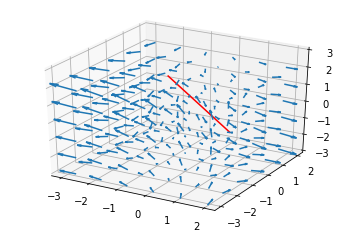

In [ ]:
# Create xy plane
x = y = z = np.arange(-3, 3, 1)

x, y, z = np.meshgrid(x, y, z)

i = x+y; j = x-z; k = z-y

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, i, j, k,pivot = 'middle', length=0.1)

x_comp = [1,0]; y_comp = [0,-2]; z_comp = [-1,3]

ax.plot(x_comp,y_comp,z_comp, color = 'red')
plt.show()


## Exercise 15.5.17
Find the total charge on the surface
$$
r = e^u \cos{v}i+e^u\sin{vj}+uk, (0\leq u \leq 1, 0 \leq v \leq \pi)
$$
if the charge density on the surface is $\delta = \sqrt{1+e^{2u}}$

remember the area element of a surface is given by:

$$
dS=|\frac{\partial r}{\partial u} \times \frac{\partial r}{\partial v}|dudv
$$

Furthermore $r$ is defined as:

$$
\frac{\partial r}{\partial u} = \frac{\partial x}{\partial u}i + \frac{\partial y}{\partial u}j + \frac{\partial z}{\partial u}k, \frac{\partial r}{\partial v} = \frac{\partial x}{\partial v}i + \frac{\partial y}{\partial v}j + \frac{\partial z}{\partial v}k
$$

So plugging in for $r$ we get:

$$
\frac{\partial r}{\partial u} = \frac{\partial}{\partial u} e^u \cos{v} + \frac{\partial}{\partial u}e^u \sin{v}+ \frac{\partial}{\partial u} u = e^ucos(v) + e^usin(v)+1 \\
\frac{\partial r}{\partial v} = \frac{\partial}{\partial v} e^u \cos{v} + \frac{\partial}{\partial v}e^u \sin{v}+ \frac{\partial}{\partial v} u = -e^usin(v) + e^ucos(v)+0
$$
Evaluating the matrix:
$$
\frac{\partial r}{\partial u} \times \frac{\partial r}{\partial v}=
\begin{vmatrix}
i & j & k \\
e^ucos(v) & e^usin(v) & 1 \\
-e^usin(v) & e^ucos(v) & 0 \\
\end{vmatrix} = e^ucos(v)+e^usin(v)+e^{2u}
$$

Now we can take the length of the inner crossproduct:
$$
dS = \sqrt{e^{u2}cos^2(v)+e^{u2}sin^2(v)+e^{4u}} dudv= \sqrt{e^{2u}(e^{2u}+1)}dudv
$$

Now we have calculated $dS$ we can use the charge density $\sqrt{1+e^{2u}}$ to calculate the total charge. We have that:

$$
charge = \int\int_{\mathcal{S}} f dS = \int\int_S \sqrt{1+e^{2u}} dS = \int\int \sqrt{1+e^{2u}} * \sqrt{e^{2u}(e^{2u}+1)}dudv = \int_0^\pi\int_0^1 e^u(1+e^{2u})dudv \rightarrow \\
\rightarrow e^u + \frac{e^{3u}}{3}|^1_0 = (e+e^3/3)-(1+1/3) = e+e^3/3-4/3 \rightarrow\\
\rightarrow \int_0^\pi e+e^3/3-4/3 dv = ev+ v*e^3/3-v4/3 |^\pi_0=e*\pi+\pi*\frac{e^3}{3}-\pi * \frac{4}{3} - 0 \\
=\pi/3(3e+e^3-4)
$$






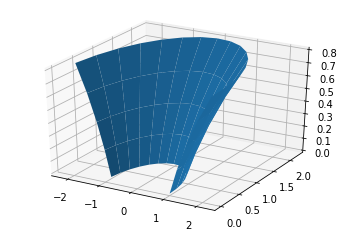

In [ ]:
# Create xy plane
u = np.arange(0,1,0.2)
v = np.arange(0,np.pi,0.2)

u, v = np.meshgrid(u,v)

i = np.e**u * np.cos(v); j = np.e**u * np.sin(v); k = u

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(i,j,k)
plt.show()



#Vector Field Exercise

For this exercise, I've chosen the vector field represented by:
$$
  v(x,y,z) = (4xy^2)i+(4yx^2)j 
$$


To show that a vector field is conservative we start by analysing the neccesary condition which in 2D is given by:

$$
\frac{\partial F_1}{\partial y}=\frac{\partial F_2}{\partial x}
$$

So in our case we have that:

$$
\frac{\partial}{\partial x} 4yx^2 = 8xy = \frac{\partial}{\partial y} 4xy^2 = 8xy
$$

So now that we satisfy the necessary condition we can plot it to help gain an intuition about whether it's conservative or not.

$$
$$

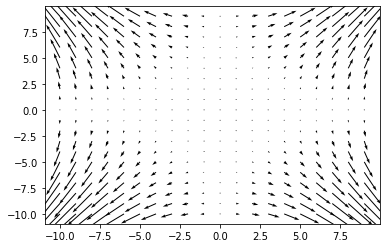

In [ ]:
x = y = z = np.arange(-10, 10, 1)
x, y = np.meshgrid(x, y)

# Define vector field
i = 4*x*y**2; j = 4*y*x**2

# Create figure
fig, ax = plt.subplots()
ax.quiver(x, y, i, j)
plt.show()

The field by inspection, doesn't seem asymmetric and it doesn't really seem to contain any other qualities that would make it nonconservative.

So next up we can find the field/stream lines for this vector field by finding the antiderivative for each component of the vector field like so:

$$
\frac{dx}{F_1(x,y)}=\frac{dy}{F_2(x,y)}
$$

So plugging in our values we get:

$$
\frac{dx}{4xy^2}=\frac{dy}{4yx^2} \rightarrow \frac{dx*x^2}{4x}=\frac{dy*y^2}{4y} \rightarrow dx*x/4=dy*y/4 = x^2/8 = y^2/8 + C
$$

Isolating $C$ we get:
$$
C = x^2/8-y^2/8
$$


And we can plot these field lines over our vector field like so:

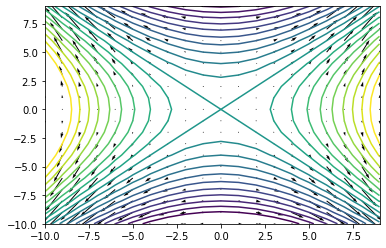

In [ ]:
x = y = z = np.arange(-10, 10, 1)
x, y = np.meshgrid(x, y)

# Define vector field
i = 4*x*y**2; j = 4*y*x**2 

# Create figure
fig, ax = plt.subplots()
ax.quiver(x, y, i, j)

#Define streamline by equation
C = x**2/8-y**2/8

levels  = np.arange(-10, 10,1)
# Plot streamlines: C assumes the values saved in the array levels
ax.contour(x, y, C, levels)

plt.show()


To rigorously show that our vector field $v(x,y,z) = (4xy^2)i+(4yx^2)j  
$ is actually conservative, we must show that there is a potential function $\phi$ that satisfies:
$$
F(x,y) = \nabla \phi (x,y) = \frac{\partial \phi}{\partial x}i +\frac{\partial \phi}{\partial y}j
$$

And this essentially equates each of the components of our vector field $F$ to a corresponding partial derivative. ie.

$$
\frac{\partial \phi}{\partial x} = 4xy^2, \frac{\partial \phi}{\partial y}=4yx^2
$$


First step in finding our potential function that satisfies the above equation is figuring out the integrals for each of the components like so:
$$
d\phi = F_1dx+F_2dy
$$

So we have:

$$
F_1 = \int 4xy^2dx, F_2 = \int 4yx^2dy \\
\phi = 2x^2y^2 + c(y)
$$

Note that our integration constant is relative to $y$ since we dont know if the constant is dependent on $y$ because we integrated with respect to $x$. So now that we know the potential satisfies that, we can use it to find $c(y)$:

$$
\frac{\partial \phi}{\partial y} =  4xy^2 +c'(y)
$$

This should look familiar now we equate $F_2$ with our result and get:
$$
4xy^2 = 4xy^2+c'(y) 
$$
this is can only be true if $c'(y)=0$ so since the function doesnt depend on y we get:

$$
\phi = 2x^2y^2
$$

Next up to complete our vector field image we are going to plot the equipotential curves.

The equipotential curves are found by:
$$
\phi(x,y)=C
$$

We can simply plot the potential function we just found to prove that $F$ was conservative or you can take the partial derivative of the potential to get back to the original funtion. So we plot it along side the former curves:


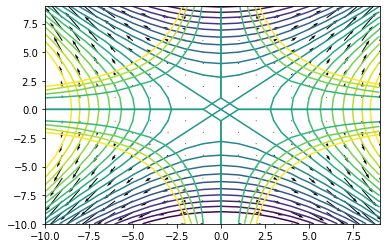

In [ ]:
x = y = z = np.arange(-10, 10, 1)
x, y = np.meshgrid(x, y)

# Define vector field
i = 4*x*y**2; j = 4*y*x**2 

# Create figure
fig, ax = plt.subplots()
ax.quiver(x, y, i, j)

#Define streamline by equation
C = x**2/8-y**2/8

levels  = np.arange(-10, 10,1)
# Plot streamlines: C assumes the values saved in the array levels
ax.contour(x, y, C, levels)

#Define equipotential by equation
C = 2*x**2*y**2

levels  = np.arange(-1000, 1000,200)
# Plot streamlines: C assumes the values saved in the array levels
ax.contour(x, y, C, levels)

plt.show()

Notice how the field lines and the equipotential lines are perpendicular

##The divergence of a 2D vector field is found by the equation:

$$
\nabla \cdot F = \frac{\partial F_1}{\partial x} + \frac{\partial F_2}{\partial y}\rightarrow \frac{\partial}{\partial x} 4xy^2 + \frac{\partial}{\partial y} 4yx^2 \rightarrow 4y^2+4x^2
$$
Note the exponent dictates that any negative input for either $x$ or $y$ will still return a positive output and since negative divergence is representative of a sink we can rule that out. 

##The curl of a vector field is found by the equation:
$$
\nabla \times F = \frac{\partial F_2}{\partial x} - \frac{\partial F_1}{\partial y} \rightarrow \frac{\partial}{\partial x} 4yx^2- \frac{\partial}{\partial y} 4xy^2 = 8xy - 8xy = 0
$$

Recall the necessary condition $\frac{\partial F_2}{\partial x} = \frac{\partial F_1}{\partial y}$ the curl of a vector field $F$ in 2D is the same equation as the necessary condition. So a conservative vector field in 2D always has 0 curl.

##Line integral of two paths 
We pick two paths, one from point $(0,0)$ to $(1,1)$ and the other from $(0,0)$ to $(0,1)$ and lastly $(1,1)$

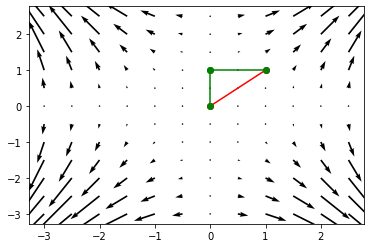

In [ ]:
x = y = z = np.arange(-3, 3, 0.5)
x, y = np.meshgrid(x, y)

# Define vector field
i = 4*x*y**2; j = 4*y*x**2

# Create figure
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], marker='o', color ='red')
ax.plot([0,0],[0,1], marker='o',color='green')
ax.plot([0,1],[1,1], marker='o',color='green')


ax.quiver(x, y, i, j)
plt.show()

The line integral is given by the equation:
$$
\int_{\mathcal C}F \cdot dr = \int_{\mathcal C}F_1dx+F_2dy
$$

A line parameterization has the equation:
$$
r(t) = (1-t)r_0+tr_1, 0 \leq t \leq 1
$$
For the first path (red path) we get:
$$
r(t)=(1-t)<0,0>+t*<1,1> =<t,t>, \text{ so } x=t,y=t
$$

Now we need to express our vector field $v(x,y,z) = (4xy^2)i+(4yx^2)j$ in terms of the line integral
$$
\int_{\mathcal C}F_1dx+F_2dy = \int (4xy^2)dx+(4yx^2)dy
$$

We can now replace y's and x's with our parameterization:

$$
\int(4xy^2)dx+(4yx^2)dy \rightarrow \int^1_0(4*t*t^2)*1 + (4*t*t^2)*1 dt\\
= \int^1_0 8t^3 dt = 2t^4 |^1_0 = 2-0
$$

Next path (green path):
$$
r(t) = (1-t)<0,0>+t<0,1> = <0,t> \text{so x=0 and y=t}
$$

Replacing x's and y's
$$
\int(4xy^2)dx+(4yx^2)dy \rightarrow\int^1_0(4*0*t^2)*0+(4*t*0^2)*1dt = 0
$$

Next point of the green path:
$$
r(t) = (1-t)<0,1>+t<1,1> = <t,1> \text{so x=t and y=1}
$$

Replacing x's and y's
$$
\int(4xy^2)dx+(4yx^2)dy \rightarrow\int^1_0 (4*t)*1+(4*1*t^2)*0 dt=\int^1_0 4t dt \\
= 2*t^2 |^1_0 = 2 - 0
$$

So the green path made up of the two seperate line integrals sums up to $2$ and so does the red path, which is not surprising since the vector field is conservative and we are calculating a line integral to the same endpoint.

